In [32]:
""" This notebook was created with testing the ML algorithms with varies of data"""

' This notebook was created with testing the ML algorithms with varies of data'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from Function import *
# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

# Training data - cross validation

## Find Best suitable data

In [34]:
def cross_val_result(X_train, y_train, models, scaler_model = None, prints= 1):
    '''
    Func to cross validate many models
    '''
    acc = 0
    max_acc = 0
    best_model = None
    for model in models:
        pipe_line = Pipeline([
        ('scaler', scaler_model),  
        ('classifier', model)])
        result = cross_val(pipe_line, 5, X_train, y_train, prints)
        acc += result
        if result >= max_acc:
            max_acc = result
            best_model = model
        print('\n')
    return acc/ len(models), best_model, max_acc

models = [
    LogisticRegression(max_iter= 10000, random_state = 17),
    RandomForestClassifier(max_depth= 7, random_state = 17),
    DecisionTreeClassifier(max_depth= 10, random_state = 17),
    SVC(probability= True, random_state = 17),
    LinearDiscriminantAnalysis(),
]

#### No normalize

In [35]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 1.44877290725708 seconds
Cross-validation scores: [0.76129032 0.74025974 0.68181818 0.72727273 0.72727273]
Mean CV score: 0.7275827398408043


Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 1.1054680347442627 seconds
Cross-validation scores: [0.74193548 0.76623377 0.7012987  0.75974026 0.74675325]
Mean CV score: 0.7431922915793884


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.04510378837585449 seconds
Cross-validation scores: [0.72903226 0.70779221 0.5974026  0.72727273 0.66883117]
Mean CV score: 0.6860661918726434


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(proba

(0.7187767071638038,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.7431922915793884)

In [36]:
data = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data = selectkbest(data.drop(columns='Target'), data['Target'], 0.7)
X_train,X_test,y_train,y_test = split_train_test(data, 'Target', 0.2)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 1.5377461910247803 seconds
Cross-validation scores: [0.77419355 0.74025974 0.67532468 0.74025974 0.73376623]
Mean CV score: 0.7327607875994973


Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 1.0879240036010742 seconds
Cross-validation scores: [0.72258065 0.79220779 0.69480519 0.77272727 0.74025974]
Mean CV score: 0.744516129032258


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.04700326919555664 seconds
Cross-validation scores: [0.7483871  0.70779221 0.64935065 0.70779221 0.68181818]
Mean CV score: 0.6990280687054881


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(prob

(0.7231872643485546,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.744516129032258)

#### Normalize

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

cross_val_result(X_train, y_train, models,scaler_model=StandardScaler())
# cross_val_result(X_train, y_train, models,scaler_model= MinMaxScaler())

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.1413424015045166 seconds
Cross-validation scores: [0.76774194 0.77272727 0.67532468 0.77272727 0.69480519]
Mean CV score: 0.7366652702136574




Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 1.0365679264068604 seconds
Cross-validation scores: [0.76129032 0.77922078 0.68181818 0.76623377 0.75324675]
Mean CV score: 0.7483619606200251


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.05692243576049805 seconds
Cross-validation scores: [0.72903226 0.69480519 0.64285714 0.68831169 0.65584416]
Mean CV score: 0.6821700879765396


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(probability=True, random_state=17))]) - With 5 folds - Finsh in 0.5112016201019287 seconds
Cross-validation scores: [0.73548387 0.75974026 0.68831169 0.74675325 0.73376623]
Mean CV score: 0.732811059907834


Pipeline(steps=[('scaler', StandardScaler()),
                ('cla

(0.7291512358609132,
 RandomForestClassifier(max_depth=7, random_state=17),
 0.7483619606200251)

#### Data using Weight of Evidence

In [39]:
data = pd.read_csv('data\credit_customers.csv')
data.columns = data.columns.str.strip()
data = data.rename(columns={"class": "Target"})
target_mapping = {'good':0, 'bad': 1}
data['Target'] = data['Target'].map(target_mapping)
X_train,X_test,y_train,y_test = split_train_test(data, 'Target', 0.2)
woe = WOE()
X_train,iv,woe_res = woe.fit(X_train, y_train)
X_test = woe.transform(X_test)

cross_val_result(X_train, y_train, models)

Pipeline(steps=[('scaler', None),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=17))]) - With 5 folds - Finsh in 0.06600260734558105 seconds
Cross-validation scores: [0.7375  0.725   0.8     0.7375  0.78125]
Mean CV score: 0.75625




Pipeline(steps=[('scaler', None),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=17))]) - With 5 folds - Finsh in 1.0406012535095215 seconds
Cross-validation scores: [0.7     0.71875 0.79375 0.73125 0.78125]
Mean CV score: 0.7449999999999999


Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=17))]) - With 5 folds - Finsh in 0.04099273681640625 seconds
Cross-validation scores: [0.64375 0.6875  0.61875 0.59375 0.725  ]
Mean CV score: 0.65375


Pipeline(steps=[('scaler', None),
                ('classifier', SVC(probability=True, random_state=17))]) - With 5 folds - Finsh in 0.47697997093200684 seconds
Cross-validation scores: [0.7375 0.7375 0.825  0.7    0.7875]
Mean CV score: 0.7575000000000001


Pipeline(steps=[('scaler', None), ('classifier', LinearDiscriminantAnalysis())]) - With 5 folds - Finsh in 0.035999298095703125 seconds
Cross-validation scores: [

(0.7324999999999999,
 SVC(probability=True, random_state=17),
 0.7575000000000001)

## Find best model performance

In [44]:
data1 = pd.read_csv('processed_data\data_lab+one.csv', index_col= 0)
data1 = selectkbest(data1.drop(columns='Target'), data1['Target'], 0.8)
X_train,X_test,y_train,y_test = split_train_test(data1, 'Target', 0.2)

models = [
    LogisticRegression(max_iter= 10000, random_state = 17),
    LogisticRegression(max_iter= 10000, random_state = 17, solver='saga', penalty = 'l1'),
    LogisticRegression(max_iter= 10000, random_state = 17, solver = 'saga', penalty = 'l2'),
    LogisticRegression(max_iter= 10000, random_state = 17, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.3),

]
cross_val_result(X_train, y_train, models,scaler_model=StandardScaler(),prints= 0)

(0.7369878508588186,
 LogisticRegression(max_iter=10000, penalty='l1', random_state=17, solver='saga'),
 0.7392542940930038)

# Predict - Out-of-Sample

In [41]:
pipe_line = Pipeline([
    # ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression(max_iter= 10000))  
])

random_forest_1 = LogisticRegression(max_iter= 10000)
pod = prediction_result(random_forest_1, X_train,X_test,y_train,y_test)

me = ModelEvaluation(pod)
me.compute_conf_mat()

(array([[129,  21],
        [ 27,  16]], dtype=int64),
 0.7512953367875648,
 0.43243243243243246,
 0.37209302325581395,
 0.4)

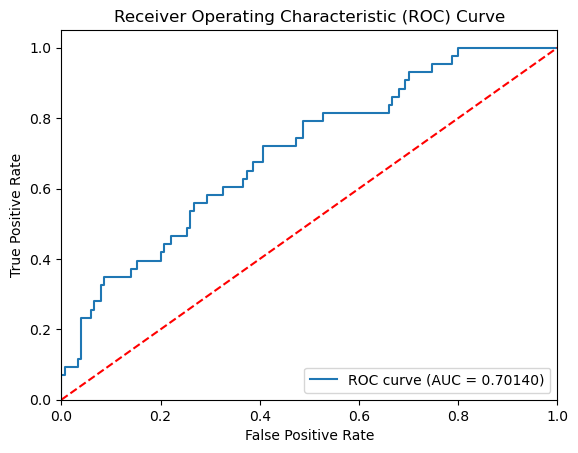

In [42]:
me.plot_roc_curve()